## Wat moet er gerapporteerd kunnen worden?
- Oplosgraad incidenten
- Oplosgraad door KIR-team
- Splitsing tussen GEO, AM en Infrax

In [78]:
import pandas as pd

#### Download lijst incidenten vanuit Xtraction: 
- 'Folders' --> 'Shared Folders' --> 'Incident' --> 'Incident Resultaten Support Team (historiek)'
- Kijk manueel na. Indien nodig, wijzig Resolution User naar 'GEO' of 'AM'


In [79]:
# Import historiek incident resultaten en mergen
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten = incidenten_geo.append(incidenten_am, ignore_index=True)
incidenten.dropna(inplace=True, how='all')

In [80]:
# Overbodige kolommen verwijderen
labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten = incidenten.drop(labels, axis=1)
incidenten.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,329449,Email,Yes,Priority 4,Onderwerp: FW: verleggen grens Aarschot/Tielt ...,MS grens Tielt-Winge aangemaakt,EAN2258 GeoView GeoLis andere incidenten,EFH383 - Stijn de Walef,2017-12-20 11:17:38,2018-02-01 11:14:53,Closed,Appl Netten GEO,BJF331 - Joris Vanderloock
2,329575,Phone,No,Priority 4,Printen vanuit geoview lukt niet altijd,Te weinig info,EAN0861 Geoview GeoLis printen lukt niet,ACL001 - Michel Monsieurs,2017-12-21 09:54:34,2018-01-31 10:50:38,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
3,330263,Email,No,Priority 4,Probleem PadConfiguratie,Probleem is opgelost,EAN1233 Elont andere incidenten,CHE143 - Wim Dert,2018-01-02 07:44:22,2018-02-01 09:04:10,Closed,Appl Netten GEO,BJF331 - Joris Vanderloock
4,332910,Phone,Yes,Priority 4,GeoView: Autoplan: De aanmaak van de afdrukken...,Afkappingsteken in straatnaam. Probleem opgelo...,EAN1169 GeoView GeoLis Autoplan,MGB222 - brenda smolders,2018-01-22 09:15:57,2018-02-01 14:43:34,Closed,Appl Netten GEO,BJF331 - Joris Vanderloock


In [81]:
incidenten.shape

(1718, 13)

In [82]:
# Convert to datetime
from datetime import datetime
import re

try:
    incidenten["Date Created"] = incidenten["Date Created"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))
except TypeError:
    print("Striptime already done!")

Striptime already done!


In [83]:
# Filter on dates
incidenten = incidenten[(incidenten["Date Created"] > '2018-09-01') & (incidenten["Date Created"] < '2019-01-01')]

In [84]:
incidenten[incidenten["Resolution Group Name"]=="Appl Netten GEO"]["Date Created"].tail()

806   2018-12-28 09:00:45
807   2018-12-28 10:50:12
808   2018-12-28 14:06:26
809   2018-12-31 10:18:22
810   2018-12-31 16:11:55
Name: Date Created, dtype: datetime64[ns]

In [85]:
incidenten.shape

(516, 13)

In [86]:
incidenten["Article"].unique()

array(['EAN0834 EAI melding Operaties & Monitoring',
       'EAN2662 Gis ControleCentrum niet gebruikt sinds 12 maanden - locked',
       'EAN0617 OCE Plotter technische incidenten',
       'EAN1169 GeoView GeoLis Autoplan',
       'EAN9995 Infrax incident e-mails (INC)',
       'EAN3507 OV WEB andere incidenten',
       'EAN1334 GeoView functionele vragen',
       'EAN0002 AutoCAD Omzetten van DWG bestanden naar DGN versie Trueview 2013',
       'EAN3341 Geolig andere incidenten',
       'EAN1163 UNITTG - TTG performantie incident - meerdere gebruikers',
       'EAN3676 Landesk - Mijn ICT-Tools - Incident na uitvoering van RFS aanvraag',
       'EAN2120 Virtuele PC incidenten',
       'EAN2258 GeoView GeoLis andere incidenten',
       'EAN1233 Elont andere incidenten',
       'EAN1366 Nemesis Middenspanning andere incidenten',
       'EAN3182 Agiv Lara andere incidenten',
       'EAN2019 Opleiding PC (ITOP) - software incidenten',
       'EAN4194 IQ plus Restart server of service',
  

In [87]:
incidenten[incidenten["Resolution Group Name"]=='Appl Netten GEO']["Resolution User"].value_counts()

QTP864 - Ken Bergers             356
PNF248 - Erwin Munters            28
AM                                18
GAH048 - Gert Van Dyck            16
GHG127 - Anneleen Robbe           15
GEO                               14
LZM524 - Bernhard Bannink         10
HIE161 - Tim De Bondt              8
ERN417 - Marieke Algoed            4
GHF281 - Didier Van Belleghem      1
JAD401 - Nick Ceulemans            1
BJF331 - Joris Vanderloock         1
Geo                                1
Name: Resolution User, dtype: int64

In [88]:
# Splitsen in AM en GEO incidenten
AM_apps = ["nemesis", "pq", "ov web", "straatlampen", "nemora", "wevab", "iq plus", "ttg", "visa"]
teamgeo = ['GHG127 - Anneleen Robbe', 'BJF331 - Joris Vanderloock', 'GAH048 - Gert Van Dyck',
           'GHF281 - Didier Van Belleghem', 'JAD401 - Nick Ceulemans',
           'ERN417 - Marieke Algoed', 'IHZ211 - Philip De Vos',
           'PPC524 - Katrien Verbeek', 'GBE165 - Gunther Daneels',
           'LZM524 - Bernhard Bannink', 'PNF248 - Erwin Munters', 'PSZ834 - Thomas Bredenoord', 'GEO']

for i in incidenten.index:
    article = str(incidenten.loc[i, "Article"]).lower()
    user = str(incidenten.loc[i, "Resolution User"])
    if (any(app in article for app in AM_apps) and (user not in teamgeo)) or user == 'AM':
        incidenten.loc[i, "Resolution Group Name"] = 'AM'
    else:
        incidenten.loc[i, "Resolution Group Name"] = 'GEO'

In [89]:
incidenten[incidenten["Resolution Group Name"]=='AM']["Resolution User"].value_counts()

QTP864 - Ken Bergers              71
AM                                20
GMQ011 - Willem Fouquart           4
HAC226 - Alain Van den Abbeele     4
JPR524 - Dieter De Vleeshouwer     3
HIE161 - Tim De Bondt              2
AAE146 - Riet De Vos               1
Name: Resolution User, dtype: int64

In [90]:
# Dit artikel zit automatisch bij GEO. Kijk na of er geen opvallend groot aantal AM gevallen zijn
incidenten[incidenten["Article"]=='EAN0834 EAI melding Operaties & Monitoring']["Summary"].value_counts()

GSDCTRCC (Controle cc refresh) job in error                                                                                4
MF162 (CreateMobileInterventionRequest) berichten in error                                                                 3
MF190 DoorgevenUpdatenInterventie: Bericht in error                                                                        3
GSDCTRCC (Controle cc_refresh) job in error                                                                                3
GTDMF585 (Uitwisseling met Synductis - Investeringswerken)                                                                 2
MF864 NieuweAndGewijzigdeAssets in error                                                                                   2
GTHCAFTD (CallAFTD.exe ) job in error en MF864 (NieuweAndGewijzigdeAssets) berichten in error                              2
MF622 (ActieSteun) bericht niet afgeleverd                                                                                 2


In [91]:
# Kijk na of alle Infrax collega's zijn toegevoegd in de lijst
infrax_collegas = ["LZM524", "NQB004", "PJS862", "PNF248", "RHC604", "PSZ834"]
incidenten["Resolution User"].unique()

array(['GEO', 'GHG127 - Anneleen Robbe', 'QTP864 - Ken Bergers',
       'PNF248 - Erwin Munters', 'AM', 'HIE161 - Tim De Bondt',
       'GAH048 - Gert Van Dyck', 'LZM524 - Bernhard Bannink',
       'BJF331 - Joris Vanderloock', 'ERN417 - Marieke Algoed',
       'GHF281 - Didier Van Belleghem', 'Geo', 'JAD401 - Nick Ceulemans',
       'AAE146 - Riet De Vos', 'GMQ011 - Willem Fouquart',
       'HAC226 - Alain Van den Abbeele', 'JPR524 - Dieter De Vleeshouwer'],
      dtype=object)

In [92]:
# Toevoegen Infrax Groep
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in infrax_collegas:
        incidenten.loc[i, "Resolution Group Name"] = "I"

incidenten["Resolution Group Name"].value_counts()

GEO    373
AM     105
I       38
Name: Resolution Group Name, dtype: int64

In [93]:
# Toevoegen KIR kolom
incidenten["KIR"] = 0
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user == "QTP864":
        incidenten.loc[i, "KIR"] = 1

incidenten["KIR"].value_counts()

1    382
0    134
Name: KIR, dtype: int64

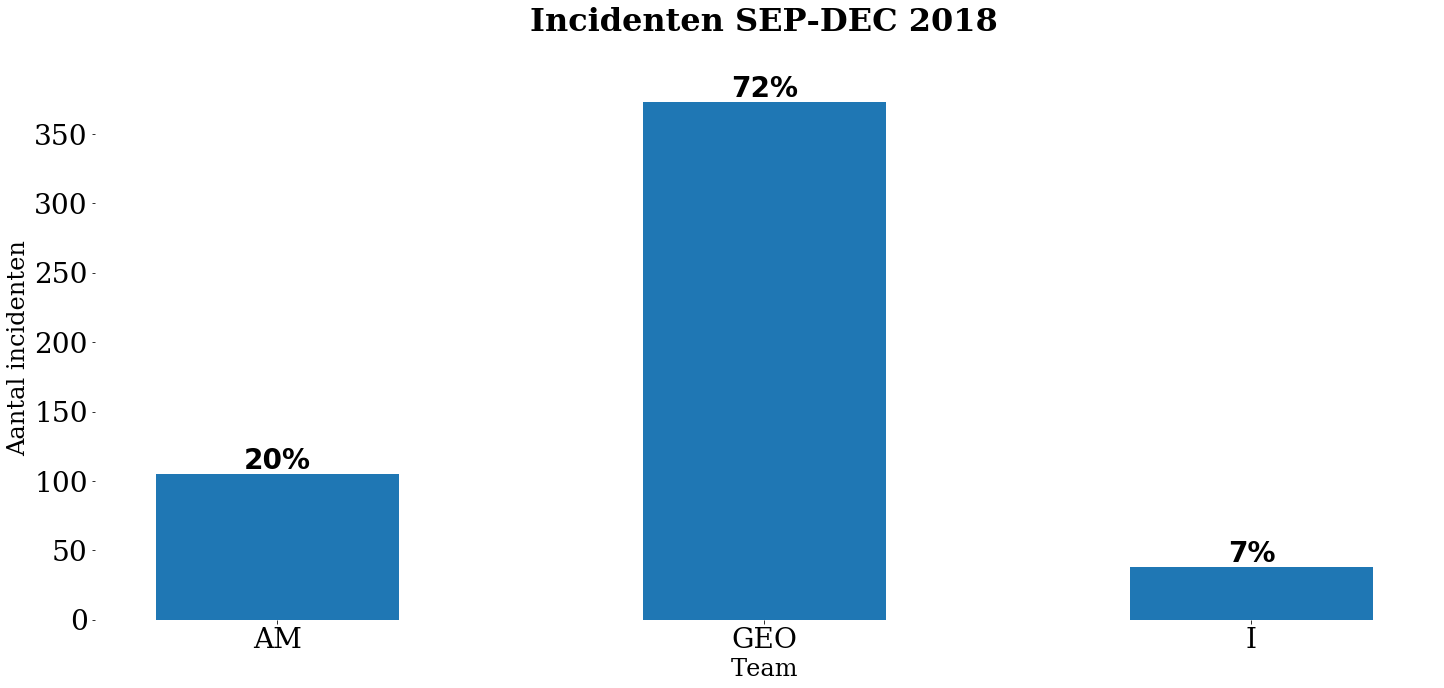

In [103]:
# Functie om plot aan te maken
import matplotlib.pyplot as plt
from numpy import arange

plt.rcParams["font.family"] = "serif"

textfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 28,
        }

def barplot(series, barwidth, xlabel, ylabel, pngname, plottitle):
    proportie = [int(x/series.sum()*100) for x in series]
    fig = plt.figure(figsize=(24, 10))
    ax = fig.add_subplot(1,1,1)
    bar_positions = arange(len(series.values)) + 1
    ax.bar(bar_positions, series.values, width=barwidth)
    tick_positions = range(1,(len(series.values)+1))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(series.index)
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.tick_params(labelsize=28)
    ax.set_title(plottitle, fontsize=32, pad=45, fontweight='bold') # Titel van plot
    for i, v in enumerate(proportie):
        ax.text(i+1, series[i]+(0.01*max(series.values)), str(v)+"%", horizontalalignment='center', color='black', fontdict=textfont)
    ax.set_frame_on(b=False)
    today = datetime.today().strftime('%Y%m%d')
    plt.savefig(pngname+"_"+today+".png") # Exporteren plot naar png
    plt.show() 

incident_by_team = incidenten.groupby(by=["Resolution Group Name"]).count()["Incident ID"]

barplot(incident_by_team, 0.5, "Team", "Aantal incidenten", "incidentsPerTeam", "Incidenten SEP-DEC 2018")

In [95]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
#incidenten_ean_KIR = incidenten_ean.groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_ean_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR_GeoAM", "Incidenten GEO+AM-Infrax sep-dec 2018")

In [96]:
#incidenten_eanAM_KIR = incidenten[incidenten["Resolution Group Name"]=="AM"].groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_eanAM_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR", "Incidenten AM sep-dec 2018")

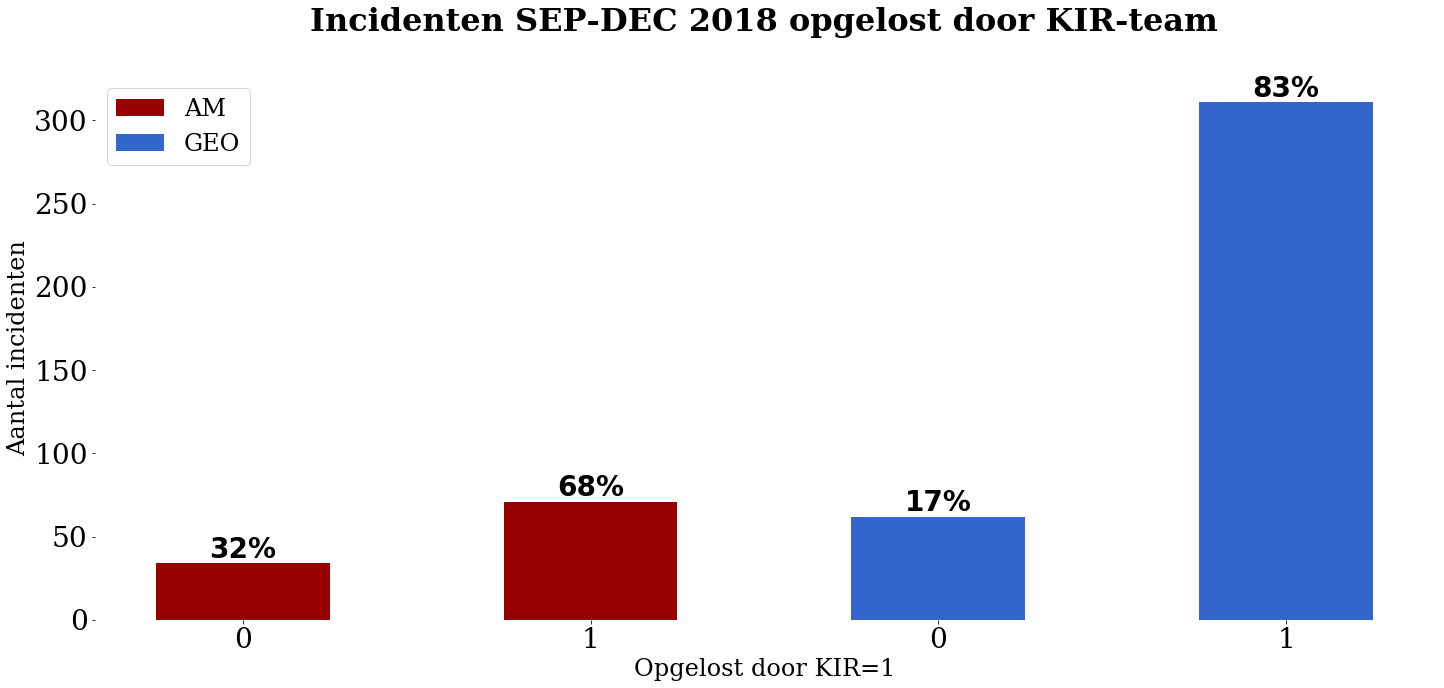

In [104]:
incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
incidenten_ean_GeoAM = incidenten_ean.groupby(by=["Resolution Group Name", "KIR"]).count()["Incident ID"]

# Bereken verhouding incidenten opgelost door KIR per team
proportie = []
for i, amount in incidenten_ean_GeoAM.items():
    if i[0] == "AM":
        som = sum(incidenten_ean_GeoAM["AM"])   
    else:
        som = sum(incidenten_ean_GeoAM["GEO"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(4) + 1
bar = ax.bar(bar_positions, incidenten_ean_GeoAM.values, width=0.5, color=barcolors)
tick_positions = range(1,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incidenten_ean_GeoAM.index.get_level_values(1))
ax.set_xlabel("Opgelost door KIR=1", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten SEP-DEC 2018 opgelost door KIR-team", fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(incidenten_ean_GeoAM):
    ax.text(i+1, v+(0.01*max(incidenten_ean_GeoAM.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
ax.legend(bar[1:3], ["AM", "GEO"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsOpgelostDoorKIR_"+today+".png")
plt.show()


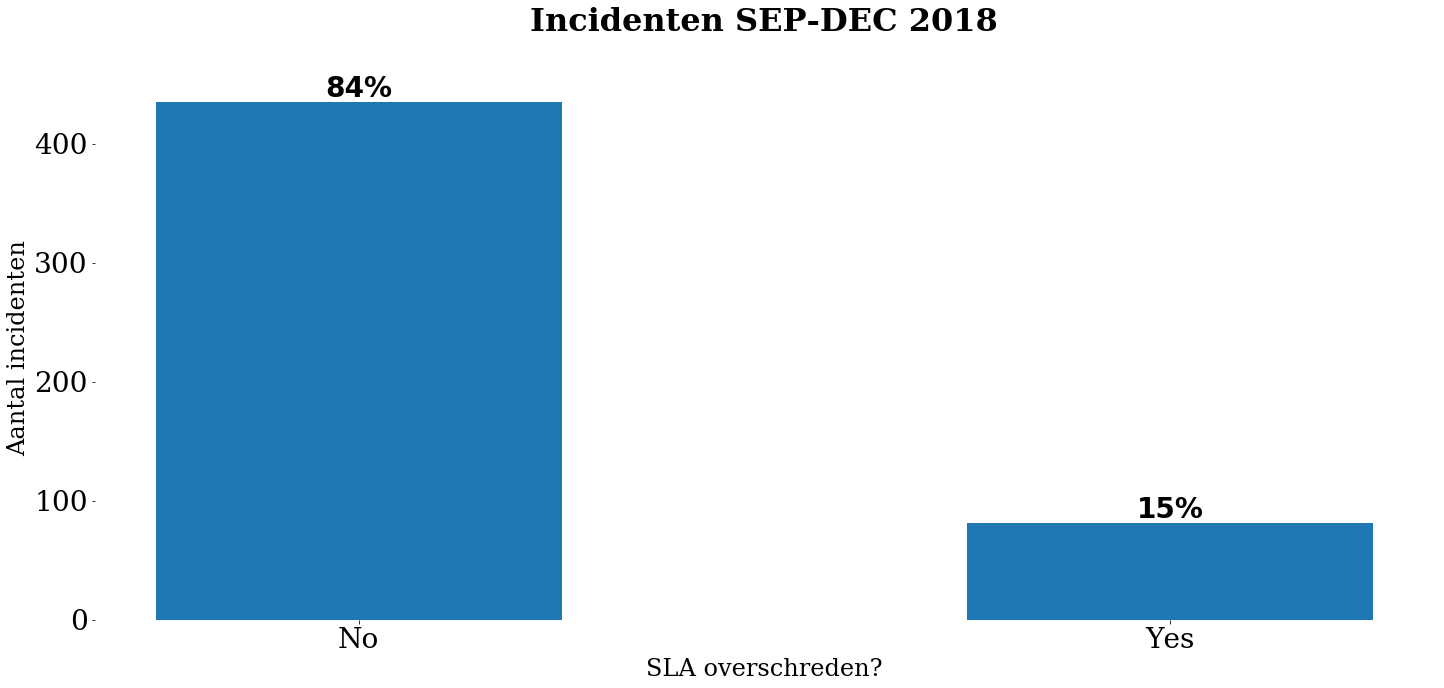

In [105]:
breached_incidenten = incidenten.groupby(by=["Is Breached"]).count()["Incident ID"]
barplot(breached_incidenten, 0.5, "SLA overschreden?", "Aantal incidenten", "incidentsBreached", "Incidenten SEP-DEC 2018")

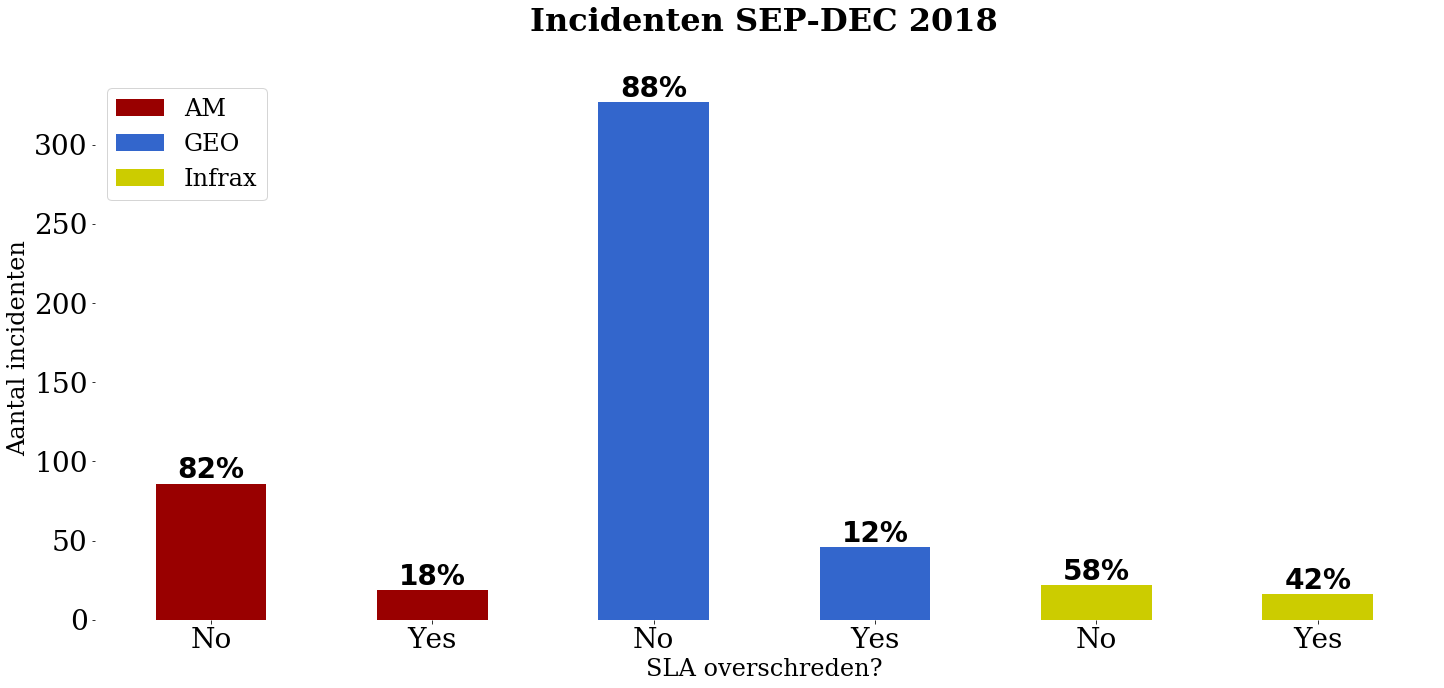

In [106]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
grouped_incidenten = incidenten.groupby(by=["Resolution Group Name", "Is Breached"]).count()["Incident ID"]

# Bereken verhouding breached incidenten per team
proportie = []
for i, amount in grouped_incidenten.items():
    if i[0] == "AM":
        som = sum(grouped_incidenten["AM"])   
    elif i[0] == "GEO":
        som = sum(grouped_incidenten["GEO"])
    else:
        som = sum(grouped_incidenten["I"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc", "#cccc00", "#cccc00"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(6) + 1
bar = ax.bar(bar_positions, grouped_incidenten.values, width=0.5, color=barcolors)
tick_positions = range(1,7)
ax.set_xticks(tick_positions)
ax.set_xticklabels(grouped_incidenten.index.get_level_values(1))
ax.set_xlabel("SLA overschreden?", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten SEP-DEC 2018", fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(grouped_incidenten):
    ax.text(i+1, v+(0.01*max(grouped_incidenten.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
ax.legend(bar[::2], ["AM", "GEO", "Infrax"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsBreachedPerTeam"+today+".png")
plt.show()


In [100]:
"""
incident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]
proportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]

barcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]

fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(9) + 1
ax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)
tick_positions = range(1,10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incident_by_team_complex.index)
ax.set_xlabel("('Team', 'Complexiteit')", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
for i, v in enumerate(incident_by_team_complex):
    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
plt.savefig("incident_by_team_complex.png")
plt.show()
"""

'\nincident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]\nproportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]\n\nbarcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]\n\nfig = plt.figure(figsize=(24, 10))\nax = fig.add_subplot(1,1,1)\nbar_positions = arange(9) + 1\nax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)\ntick_positions = range(1,10)\nax.set_xticks(tick_positions)\nax.set_xticklabels(incident_by_team_complex.index)\nax.set_xlabel("(\'Team\', \'Complexiteit\')", fontsize=24)\nax.set_ylabel("Aantal incidenten", fontsize=24)\nax.tick_params(labelsize=28)\nfor i, v in enumerate(incident_by_team_complex):\n    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment=\'center\', color=\'black\', fontdict=textfont)\nax.set_frame_on(b=False)\nplt.savefig("incident_by_tea

In [101]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
345,364576,Email,No,Priority 4,RE: Melding via formulier: DENDERLEEUW - MEIBO...,Reeds opgelost met bugfix van 17/08. Gevallen ...,EAN3507 OV WEB andere incidenten,EHJ005 - Marc Verschraege,2018-09-03 14:57:15,2018-09-04 13:06:10,Closed,AM,AM,0
369,365740,Email,No,Priority 4,OV web,Was een straat die nog niet gekend was in OV W...,EAN3507 OV WEB andere incidenten,CZM376 - Bianca Minne,2018-09-07 11:19:21,2018-09-07 13:39:17,Closed,AM,AM,0
371,365820,Email,No,Priority 4,OV web,"Dit wordt opgenomen om aan te passen, dit is n...",EAN3507 OV WEB andere incidenten,CZM376 - Bianca Minne,2018-09-07 15:20:14,2018-09-10 12:45:22,Closed,AM,AM,0
426,370546,Self Service,Yes,Priority 3,PADMF192 (Publicatie GON info op website stroo...,DB-only 17/10,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2018-09-24 14:13:28,2018-10-22 09:41:58,Closed,AM,AM,0
429,370670,Phone,Yes,Priority 4,Assets kunnen enkel individueel geplaatst word...,Update OV Web op 19/10,EAN4152 OV WEB Deelnetwerk (DNW) incidenten,ABQ292 - Jonas Donckers,2018-09-25 08:04:21,2018-10-22 09:42:20,Closed,AM,AM,0
448,371751,Phone,Yes,Priority 3,"Oei, er ging iets mis",Update OV Web op 19/10,EAN3507 OV WEB andere incidenten,FFE026 - Johan Dhaenens,2018-10-01 08:43:42,2018-10-22 09:42:42,Closed,AM,AM,0
504,374141,Phone,Yes,Priority 4,Straatlampen status geeft developer versie Goo...,Update OV Web op 19/10,EAN1631 Website Eandis - Straatlampen andere i...,IFG246 - Pieter De Mol,2018-10-11 11:16:45,2018-10-22 09:54:35,Closed,AM,AM,0
531,376232,Email,No,Priority 4,LIVELINK-aanvraag: smeets_WEB-20181017-19305216,Wordt opgelost op 19/10 met update,EAN1631 Website Eandis - Straatlampen andere i...,EEC017 - Dirk Jengember,2018-10-17 13:25:15,2018-10-17 14:45:09,Closed,AM,AM,0
569,378114,Email,No,Priority 3,Ontbrekende deelgemeente (Opvelp) in OV-Web vo...,Op niveau van deelgemeente was het gekoppeld.\...,EAN3507 OV WEB andere incidenten,IDH447 - Thierry Demeire,2018-10-25 12:50:02,2018-10-26 09:14:21,Closed,AM,AM,0
643,383178,Phone,No,Priority 4,Nieuwe vergunning toevoegen is niet toegestaan,Opgelost door Mieke Vercauteren,EAN1442 Wevab rechten incident,PLZ123 - Nick De Vrieze,2018-11-22 08:52:25,2018-12-05 10:27:51,Closed,AM,AM,0


In [102]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
410,369348,Email,Yes,Priority 4,Tussenkomsten gas lokatiefouten in Nemesis gas,Gezien we geen feedback meer hebben ontvangen ...,EAN1357 Nemesis Gas andere incidenten,EGH004 - Hendrik Decock,2018-09-18 15:44:29,2018-11-23 15:56:18,Closed,AM,QTP864 - Ken Bergers,1
426,370546,Self Service,Yes,Priority 3,PADMF192 (Publicatie GON info op website stroo...,DB-only 17/10,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2018-09-24 14:13:28,2018-10-22 09:41:58,Closed,AM,AM,0
429,370670,Phone,Yes,Priority 4,Assets kunnen enkel individueel geplaatst word...,Update OV Web op 19/10,EAN4152 OV WEB Deelnetwerk (DNW) incidenten,ABQ292 - Jonas Donckers,2018-09-25 08:04:21,2018-10-22 09:42:20,Closed,AM,AM,0
448,371751,Phone,Yes,Priority 3,"Oei, er ging iets mis",Update OV Web op 19/10,EAN3507 OV WEB andere incidenten,FFE026 - Johan Dhaenens,2018-10-01 08:43:42,2018-10-22 09:42:42,Closed,AM,AM,0
477,372849,Email,Yes,Priority 3,TTG,Interventie is reeds afgesloten,EAN1158 UNITTG - TTG andere incidenten 1 gebru...,CGG191 - Kelly Van Loock,2018-10-04 16:30:36,2018-10-10 09:25:41,Closed,AM,QTP864 - Ken Bergers,1
504,374141,Phone,Yes,Priority 4,Straatlampen status geeft developer versie Goo...,Update OV Web op 19/10,EAN1631 Website Eandis - Straatlampen andere i...,IFG246 - Pieter De Mol,2018-10-11 11:16:45,2018-10-22 09:54:35,Closed,AM,AM,0
579,379514,Phone,Yes,Priority 4,Nemesis loopt vast.,Vermoedelijk opgelost met update van 23/11,EAN1357 Nemesis Gas andere incidenten,HDJ174 - Jeffrey Vandewalle,2018-11-05 10:28:24,2018-11-29 14:16:07,Closed,AM,QTP864 - Ken Bergers,1
677,385100,Phone,Yes,Priority 4,Nemesis middenspanning en onjuiste weergave in...,DB-only vandaag,EAN1366 Nemesis Middenspanning andere incidenten,FAK040 - Wilfried Van Den Eede,2018-11-30 13:13:11,2018-12-12 10:54:36,Closed,AM,QTP864 - Ken Bergers,1
715,386771,Self Service,Yes,Priority 3,Dollar Univer$e-job TDDNMSMS EXDMSPRBTH (Nemes...,TNS names op $U server aangepast,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2018-12-10 08:26:02,2018-12-12 10:51:37,Closed,AM,AM,0
716,386780,Self Service,Yes,Priority 3,$Universe-job ABDNMGS (batch nemesisgasprior) ...,TNS names op $U server aangepast,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2018-12-10 08:38:12,2018-12-12 10:52:07,Closed,AM,AM,0
